# pyCUBs: Codon Usage Bias，CUB base on python 这个库主要是研究密码子偏好性

## 已经开发和计划开发的功能列表

[Done] Observed number of occurrences of codon (Obs) analysis


[Done] Stat frequency of cusp software. cusp website: https://www.bioinformatics.nl/cgi-bin/emboss/cusp


[Done] Stat frequency of cusp software.


[Done] Relative synonymous codon usage (RSCU) analysis


[Done] Draw codon barplot


[Done] Parity rule 2 (PR2) analysis


[Done] Draw Neutrality curve


[Done] Draw ENC plot


[Done] Cups sortware anslysis


[Done part] codonW sortware anslysis


[Plan] Codon Bias Index


[Plan] Frequency of OPtimal codons


[Plan] CAI analysis


[Plan] Corresponding analysis (COA)


## 依赖和测试环境

scipy >= v1.11.4


numpy >= v1.26.3


seaborn >= v0.13.1


matplotlib >= v3.8.2


python >= v3.11.5

## 测试数据

Min.mt.fasta 数据来自这篇论文蔡元保, 杨祥燕. 澳洲坚果光壳种叶绿体基因组的密码子使用偏好性及其影响因素分析[J]. 植物科学学报, 2022, 40(2): 229-239. DOI: 10.11913/PSJ.2095-0837.2022.20229

In [1]:
## 导入库
import sys
sys.path.append('/mnt/nfs1/jupyter/pyCUBs/pyCUBs/') # 库的路径
import pycubcore

## 切换测试工作路径, 导入测试数据
import os
os.chdir('/mnt/nfs1/jupyter/pyCUBs/')
inputfile = "./test_data/Min.mt.fasta"

## 模块介绍
"""
├── codontables.py  # 密码子表模块
├── fastaio.py      # Fasta IO 模块
└── pycubcore.py    # CUB 核心计算模块
"""
import codontables
print("\n可用的遗传密码子表：\n",codontables.CodonTables())
import fastaio
help(fastaio.FastaIO)

## 库的一些信息
print(pycubcore.__author__)
print("pycubcore的函数：", pycubcore.__all__)
print("版本号：",pycubcore.__version__)


可用的遗传密码子表：
 Reference website: https://www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi?chapter=tgencodes

Translate Tables/Genetic Codes:
 1: Standard
 2: Vertebrate Mitochondrial
 3: YeastMitochondrial
 4: Mold Mitochondrial, Protozoan Mitochondrial, Coelenterate Mitochondrial, Mycoplasma, Spiroplasma
 5: Invertebrate Mitochondrial
 6: Ciliate Nuclear, Dasycladacean Nuclear, Hexamita Nuclear
 9: Echinoderm Mitochondrial, Flatworm Mitochondrial
10: Euplotid Nuclear
11: Bacterial, Archaeal, Plant Plastid
12: Alternative Yeast Nuclear
13: Ascidian Mitochondrial
14: Alternative Flatworm Mitochondrial
16: Chlorophycean Mitochondrial
21: Trematode Mitochondrial
22: Scenedesmus obliquus Mitochondrial
23: Thraustochytrium Mitochondrial
24: Rhabdopleuridae Mitochondrial
25: Candidate Division SR1, Gracilibacteria
26: Pachysolen tannophilus Nuclear
27: Karyorelict Nuclear
28: Condylostoma Nuclear
29: Mesodinium Nuclear
30: Peritrich Nuclear
31: Blastocrithidia Nuclear
33: Cephalodisc

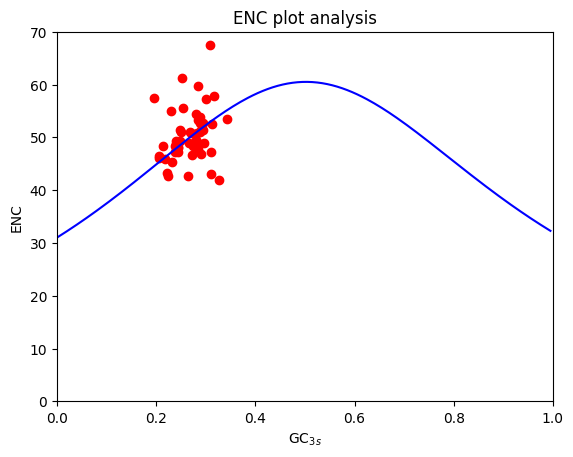

In [2]:
## example1: Effective number of codons (ENC) analysis
ENCResult = pycubcore.ENC(inputfile, Genetic_Codes=16) #Genetic_Codes=16 选择遗传密码子表16 植物叶绿体
pycubcore.DrawENC(ENCResult)

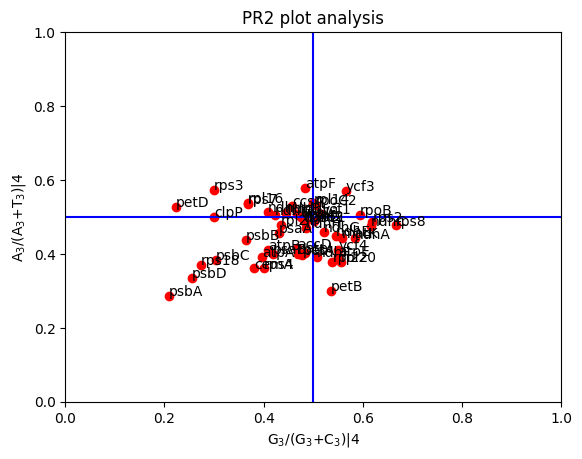

In [3]:
# example2: Parity rule 2 (PR2) analysis.
PR2Result = pycubcore.PR2(inputfile, Genetic_Codes=16)
pycubcore.DrawPR2(PR2Result, show_label=True) #展示gene name

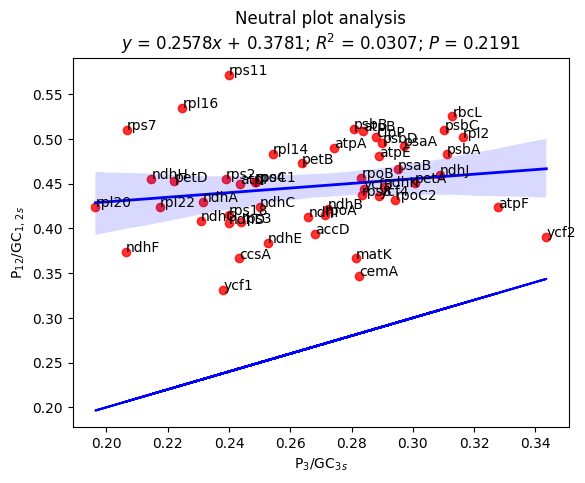

In [14]:
# example3: Neutral plot analysis.
NPAResult = pycubcore.NPA(inputfile, Genetic_Codes=16)
pycubcore.DrawNPA(NPAResult, show_label=True) #展示gene name

输入的序列：

>psbA
ATGACTGCAATTTTAGAGAGACGCGAAAGCGAAAGCCTATGGGGTCGCTTCTGTAACTGGATAACCAGCACTGAGAACCGTCTTTACATTGGATGGTTTGGTGTTTTGATGATCCCTACCTTATTGACCGCAACTTCTGTATTTATTATCGCCTTCATTGCTGCTCCTCCAGTAGATATTGATGGTATTCGTGAACCTGTTTCTGGGTCTCTACTTTACGGAAACAATATTATCTCTGGTGCCATTATTCCTACTTCTGCAGCTATAGGATTGCACTTTTACCCGATATGGGAAGCGGCATCCGTTGATGAATGGTTATACAATGGTGGTCCTTATGAATTGATTGTTCTACACTTCTTACTTGGTGTAGCTTCTTACATGGGTCGTGAGTGGGAACTAAGTTTCCGTCTGGGTATGCGCCCTTGGATTGCTGTTGCATATTCAGCTCCTGTTGCAGCTGCAACTGCTGTTTTCTTGATCTACCCAATCGGTCAAGGAAGCTTCTCTGATGGTATGCCCCTAGGAATCTCTGGTACTTTCAACTTCATGATTGTATTCCAGGCTGAGCACAACATTCTTATGCACCCATTTCACATGTTAGGTGTGGCTGGTGTATTCGGCGGCTCCCTATTCAGTGCTATGCATGGTTCCTTGGTAACTTCAAGTTTGATCAGGGAAACCACTGAAAATGAATCTGCTAATGAAGGTTACAGATTCGGTCAAGAGGAAGAAACTTATAATATCGTAGCTGCTCATGGTTATTTTGGCCGATTGATCTTCCAATATGCTAGTTTCAACAATTCTCGTTCTTTACATTTCTTCCTAGCTGCTTGGCCTGTAGTAGGTATCTGGTTCACTGCTTTAGGTATTAGTACCATGGCTTTCAACCTAAATGGTTTCAATTTCAACCAATCCGTAGTTGACAGTCAAGGTCGTGTAATTAACACTTGGGCTGATATCATCAACCGTGCTAACCTTGGTATGGA

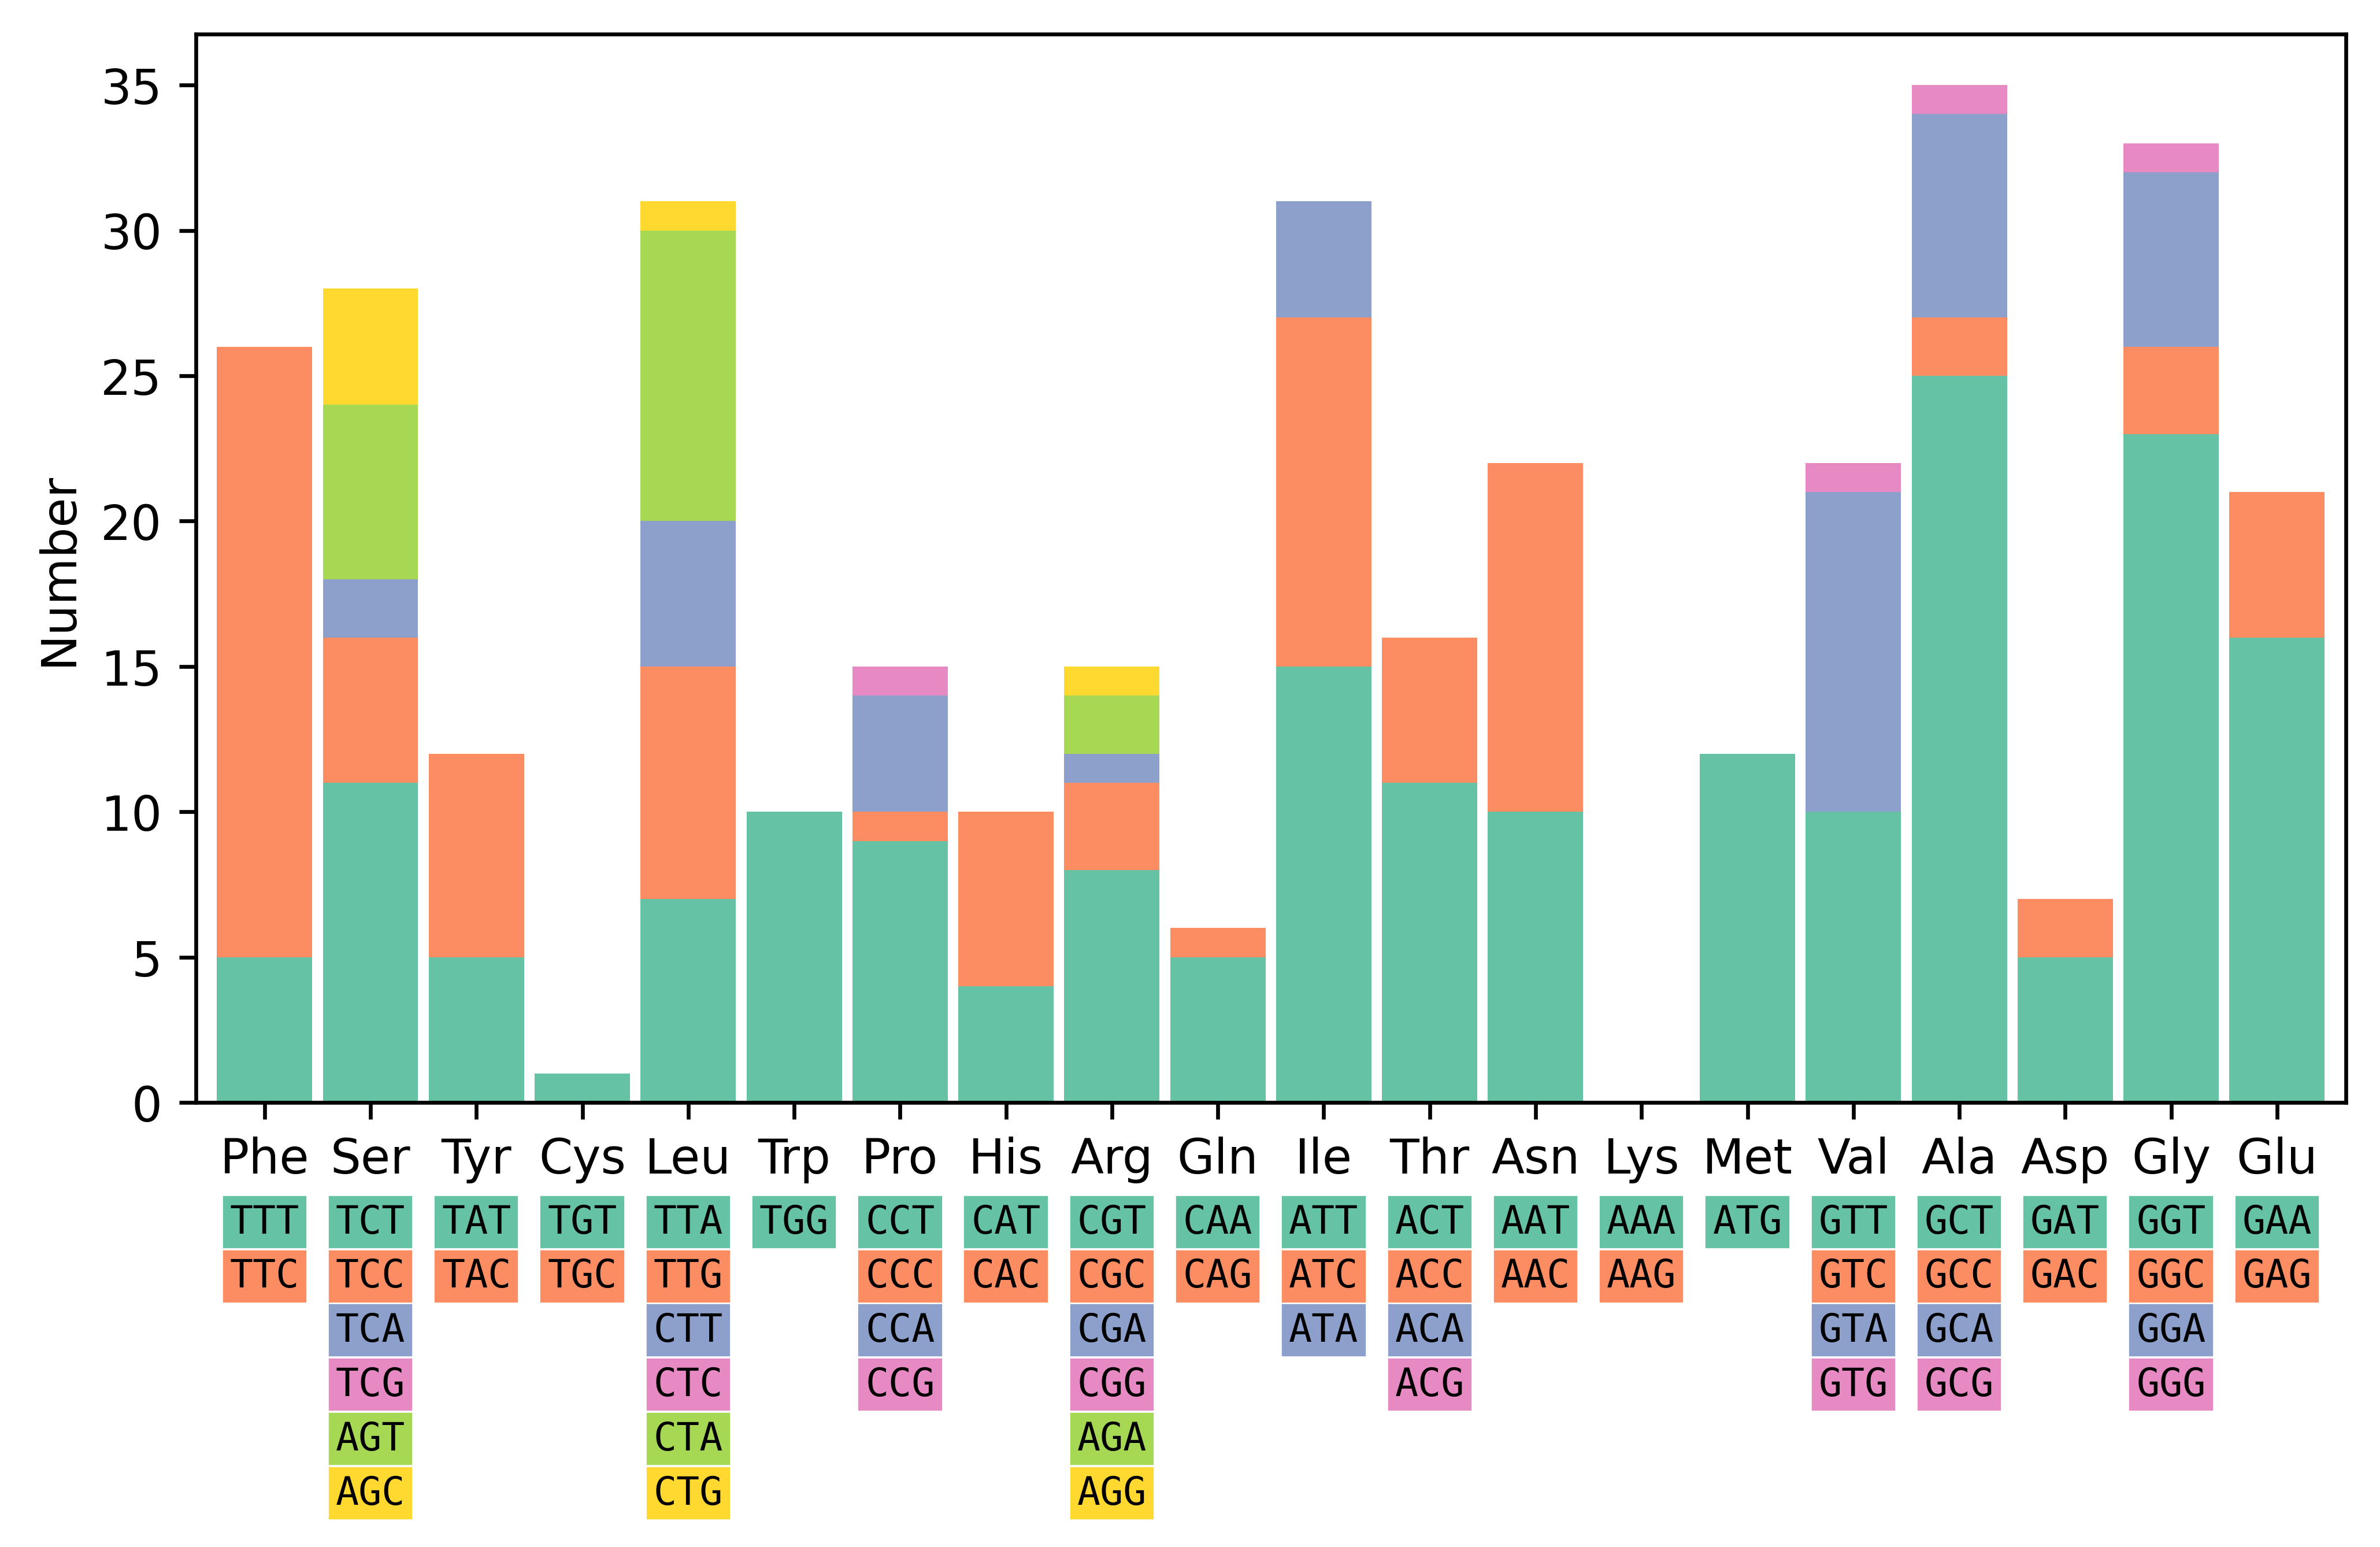

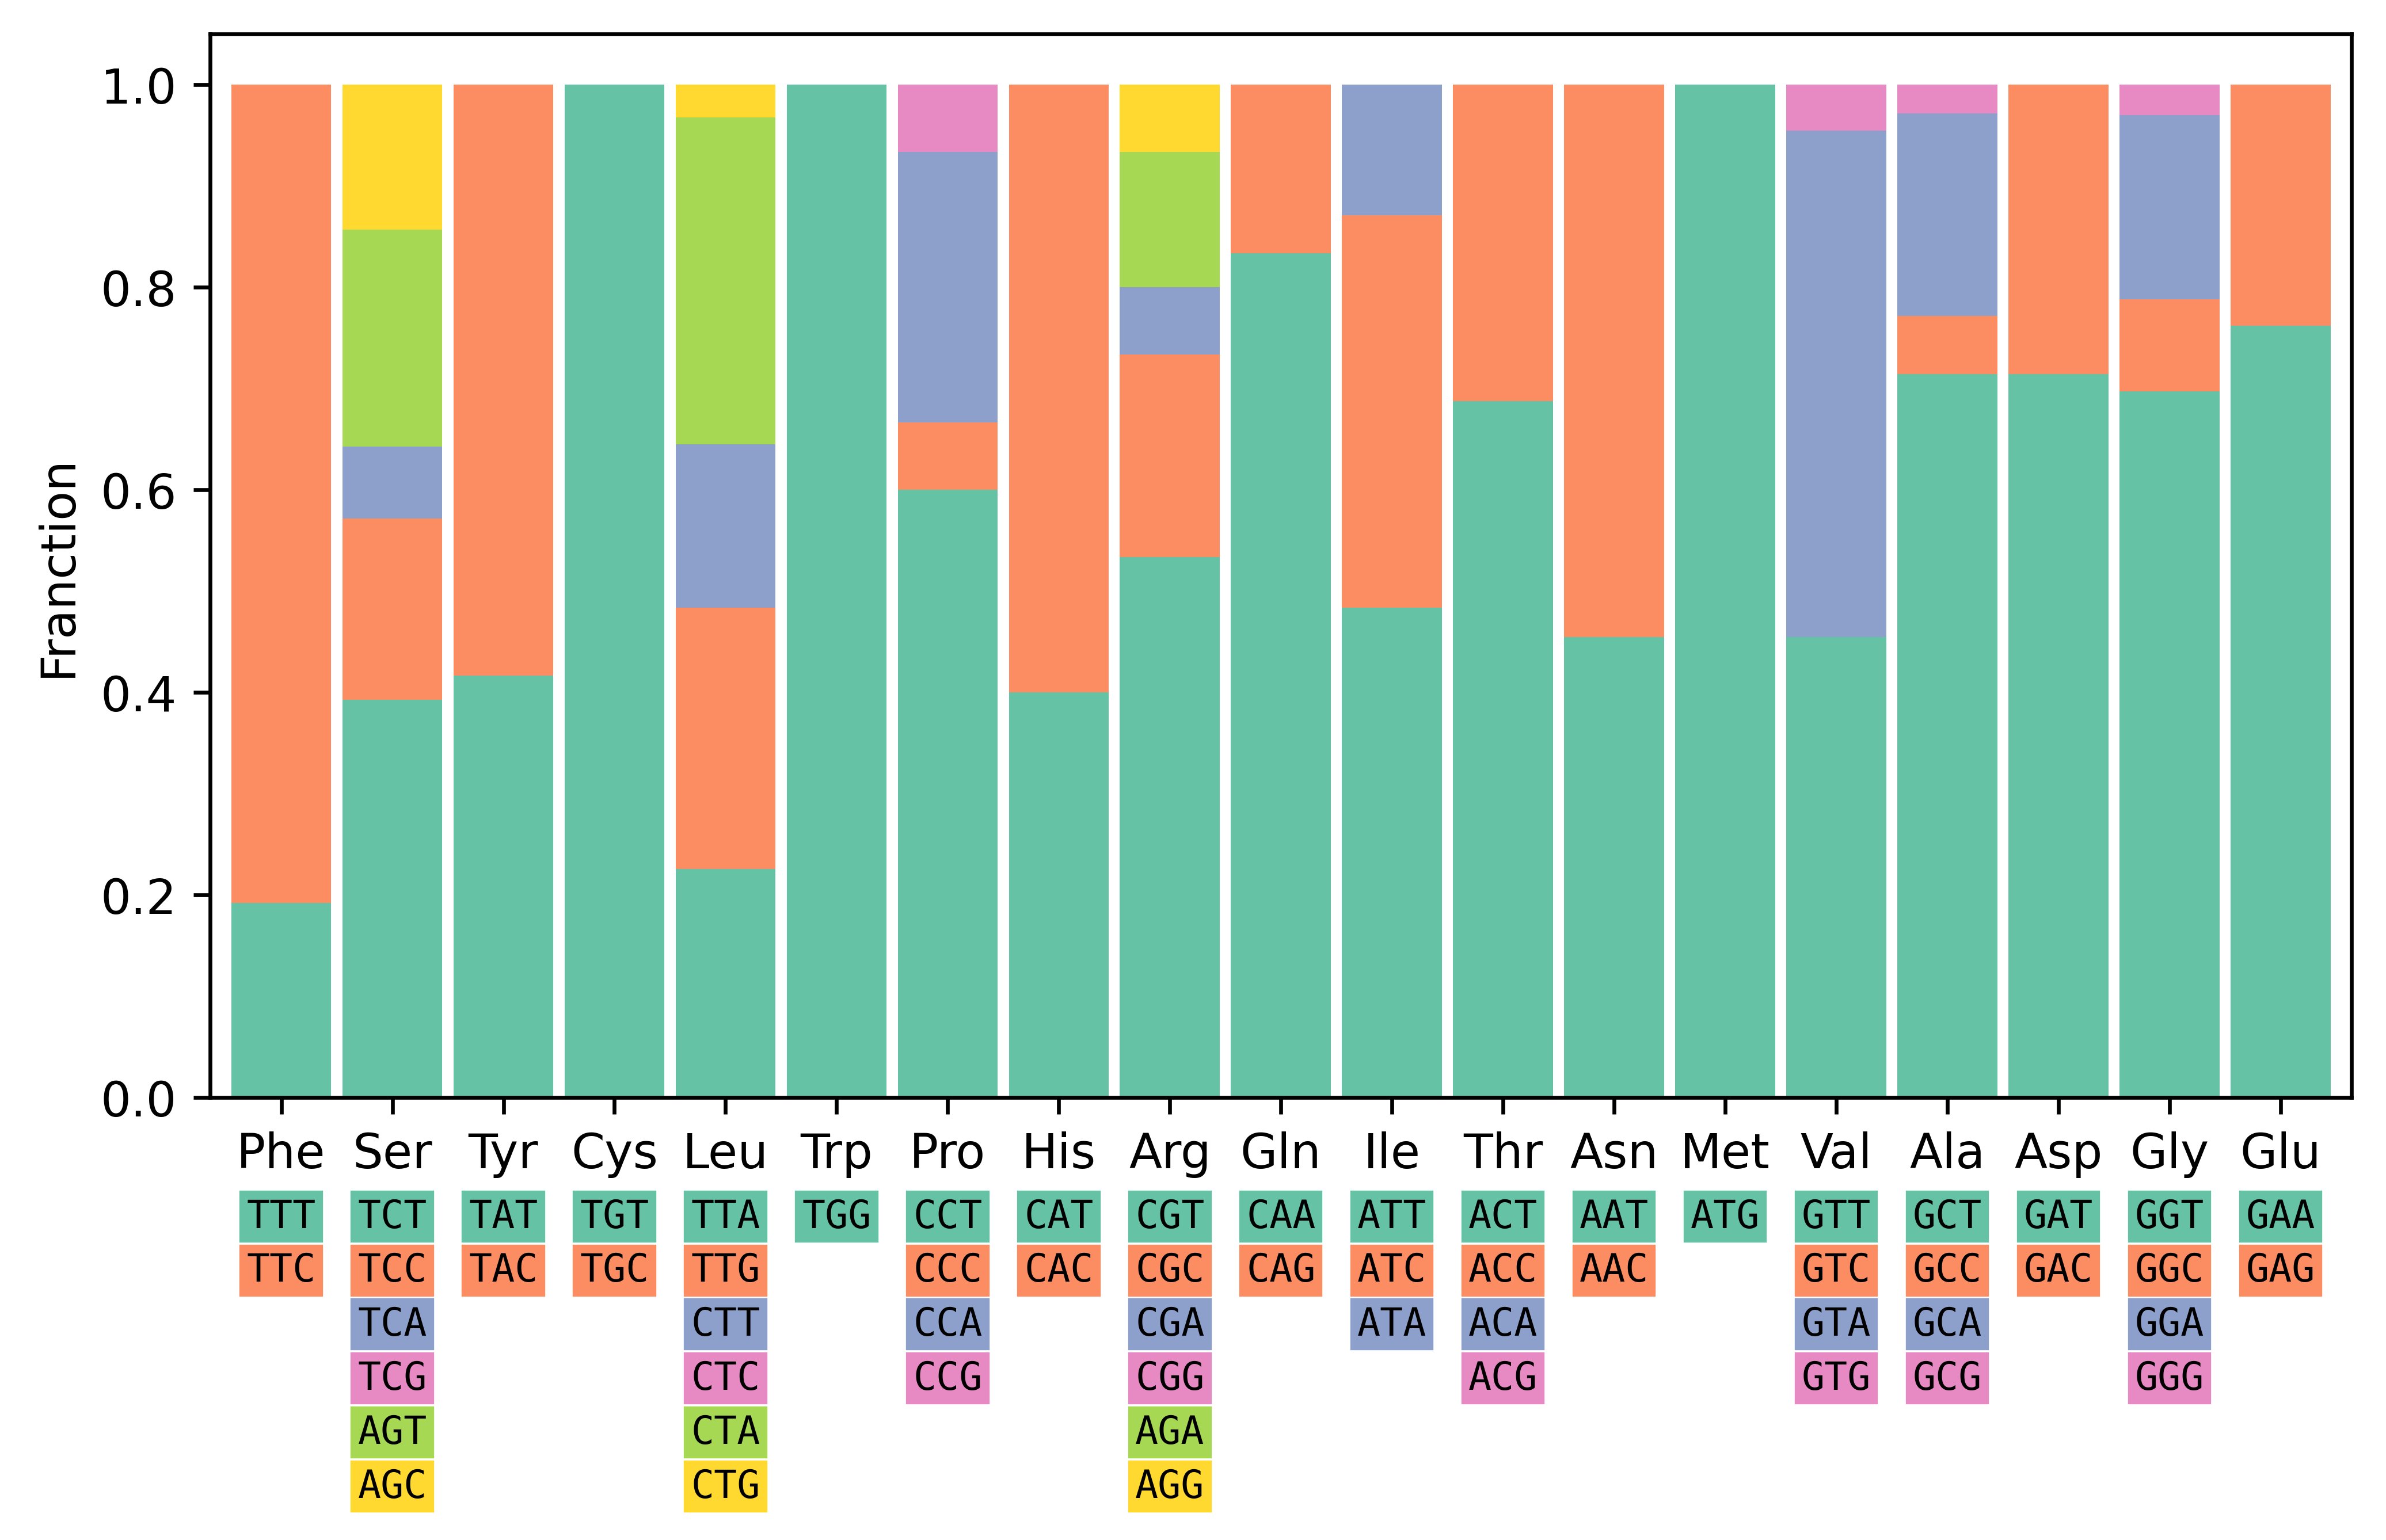

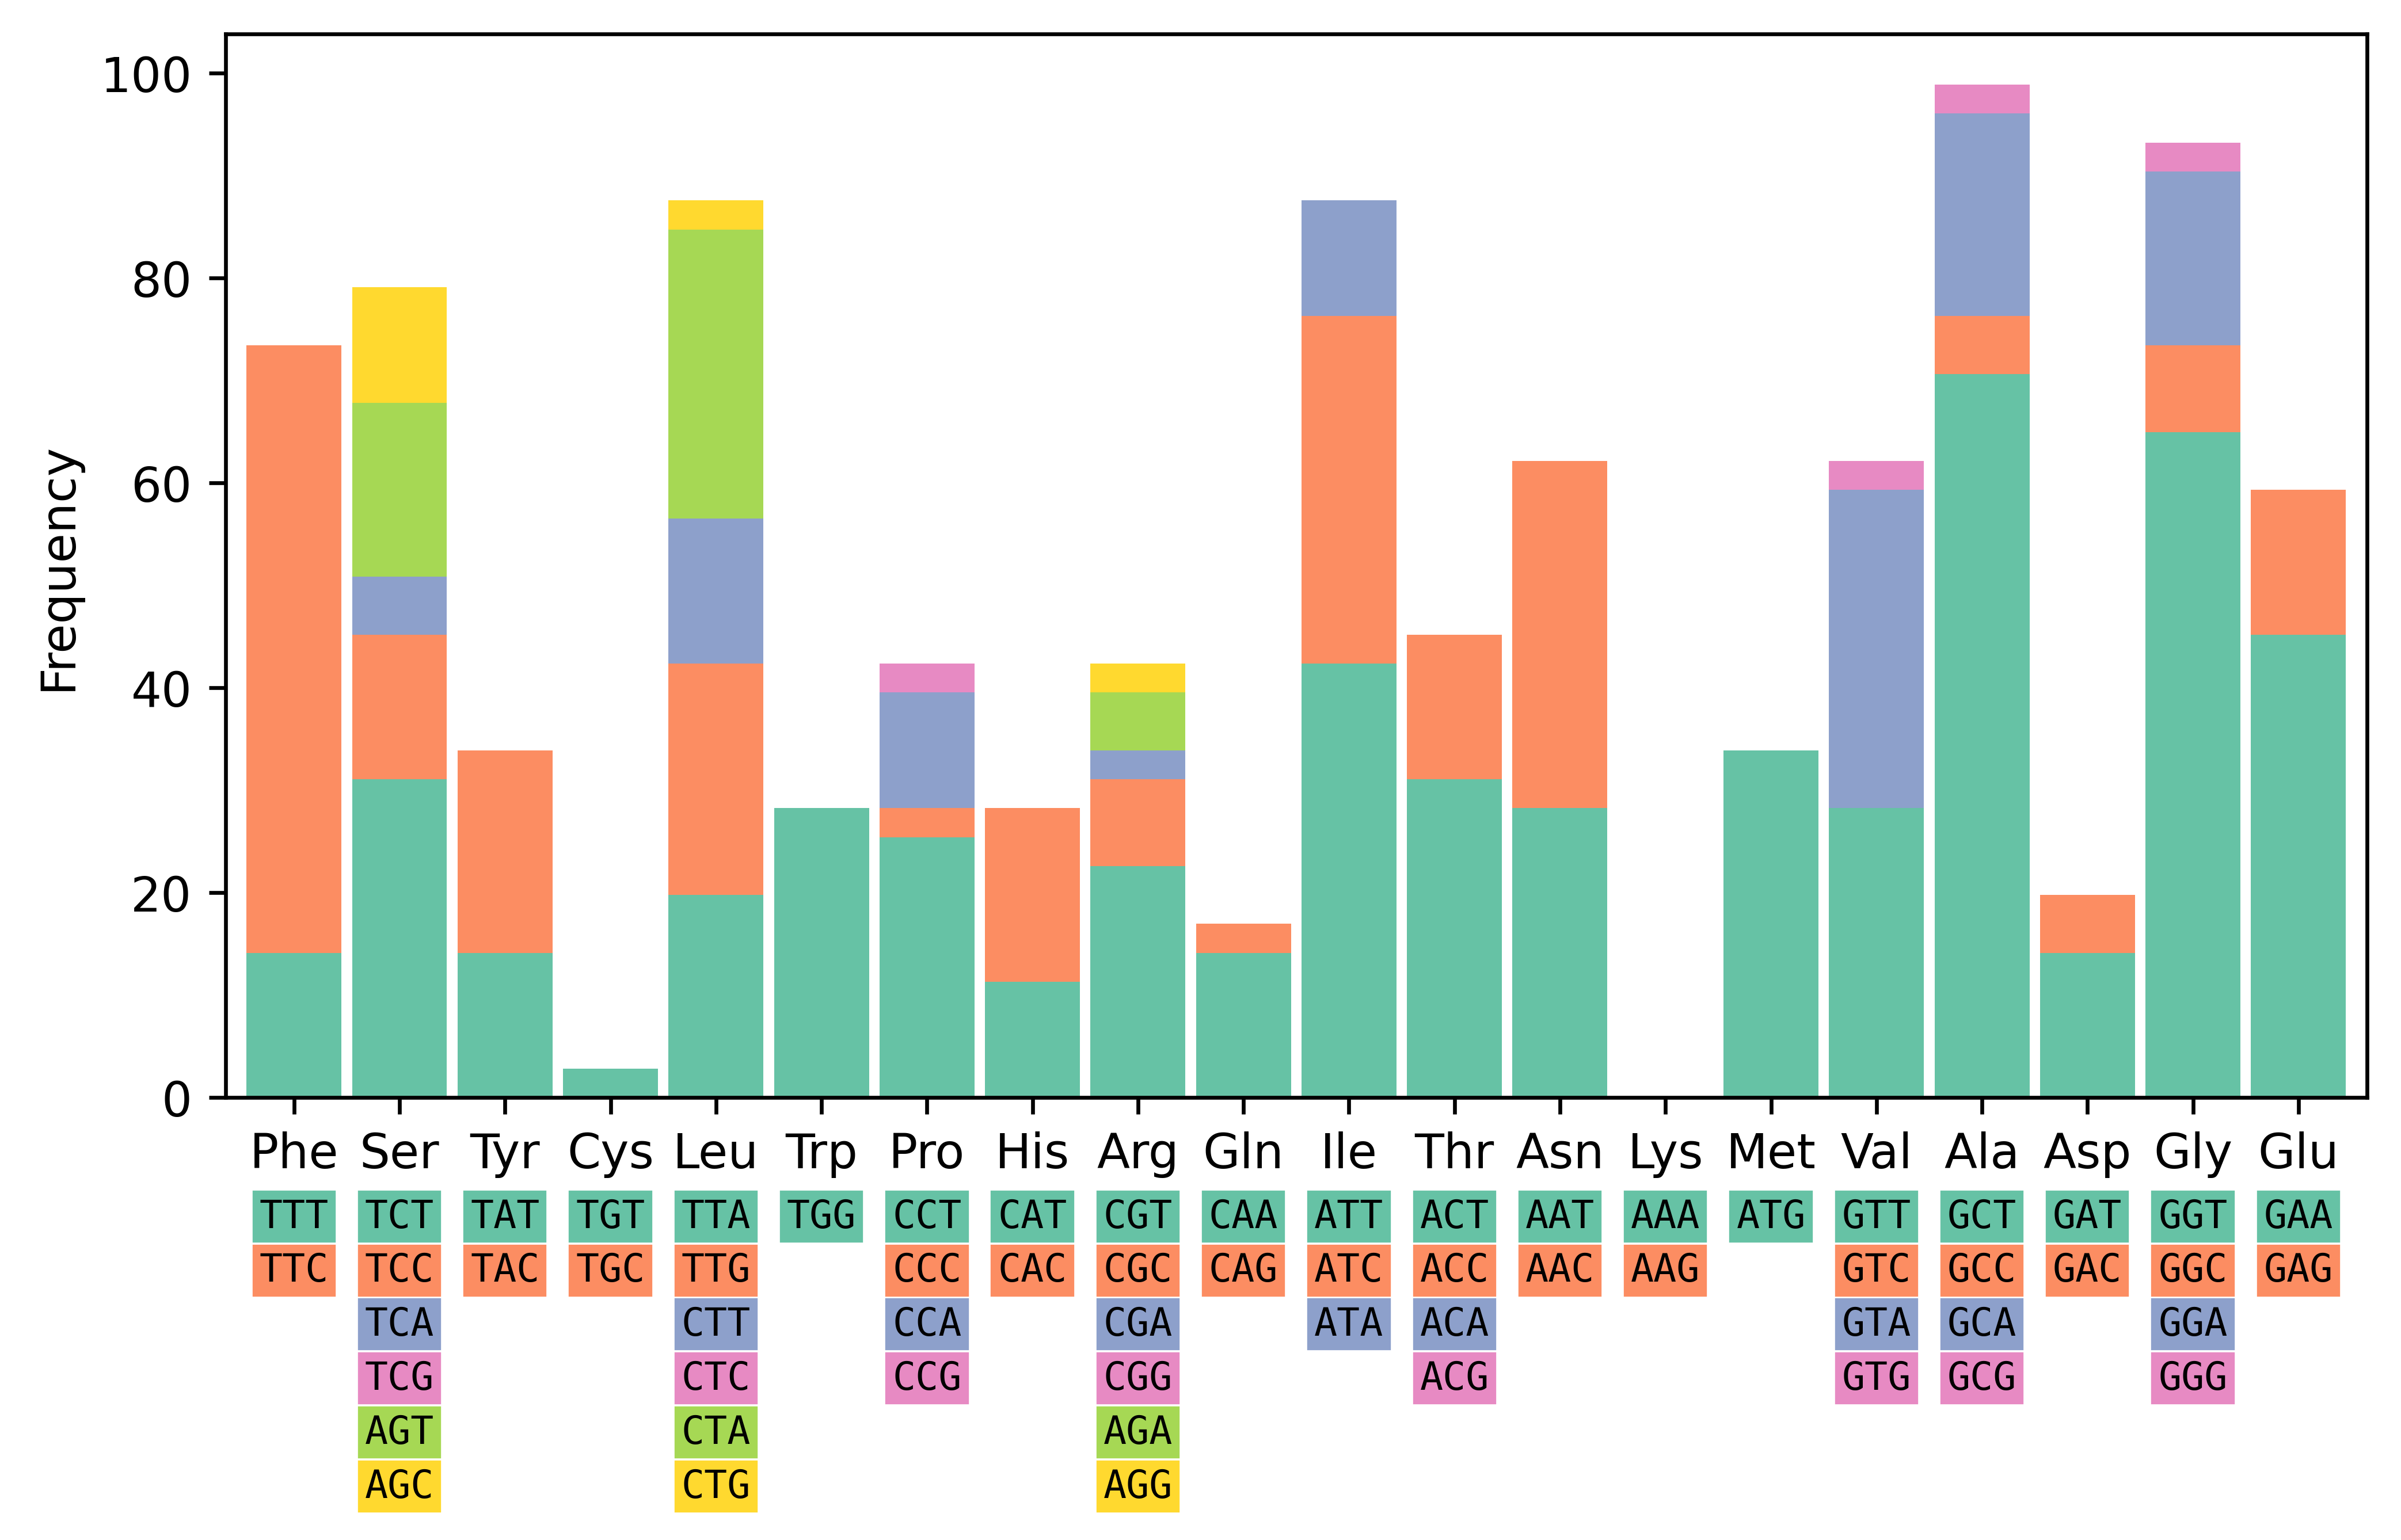

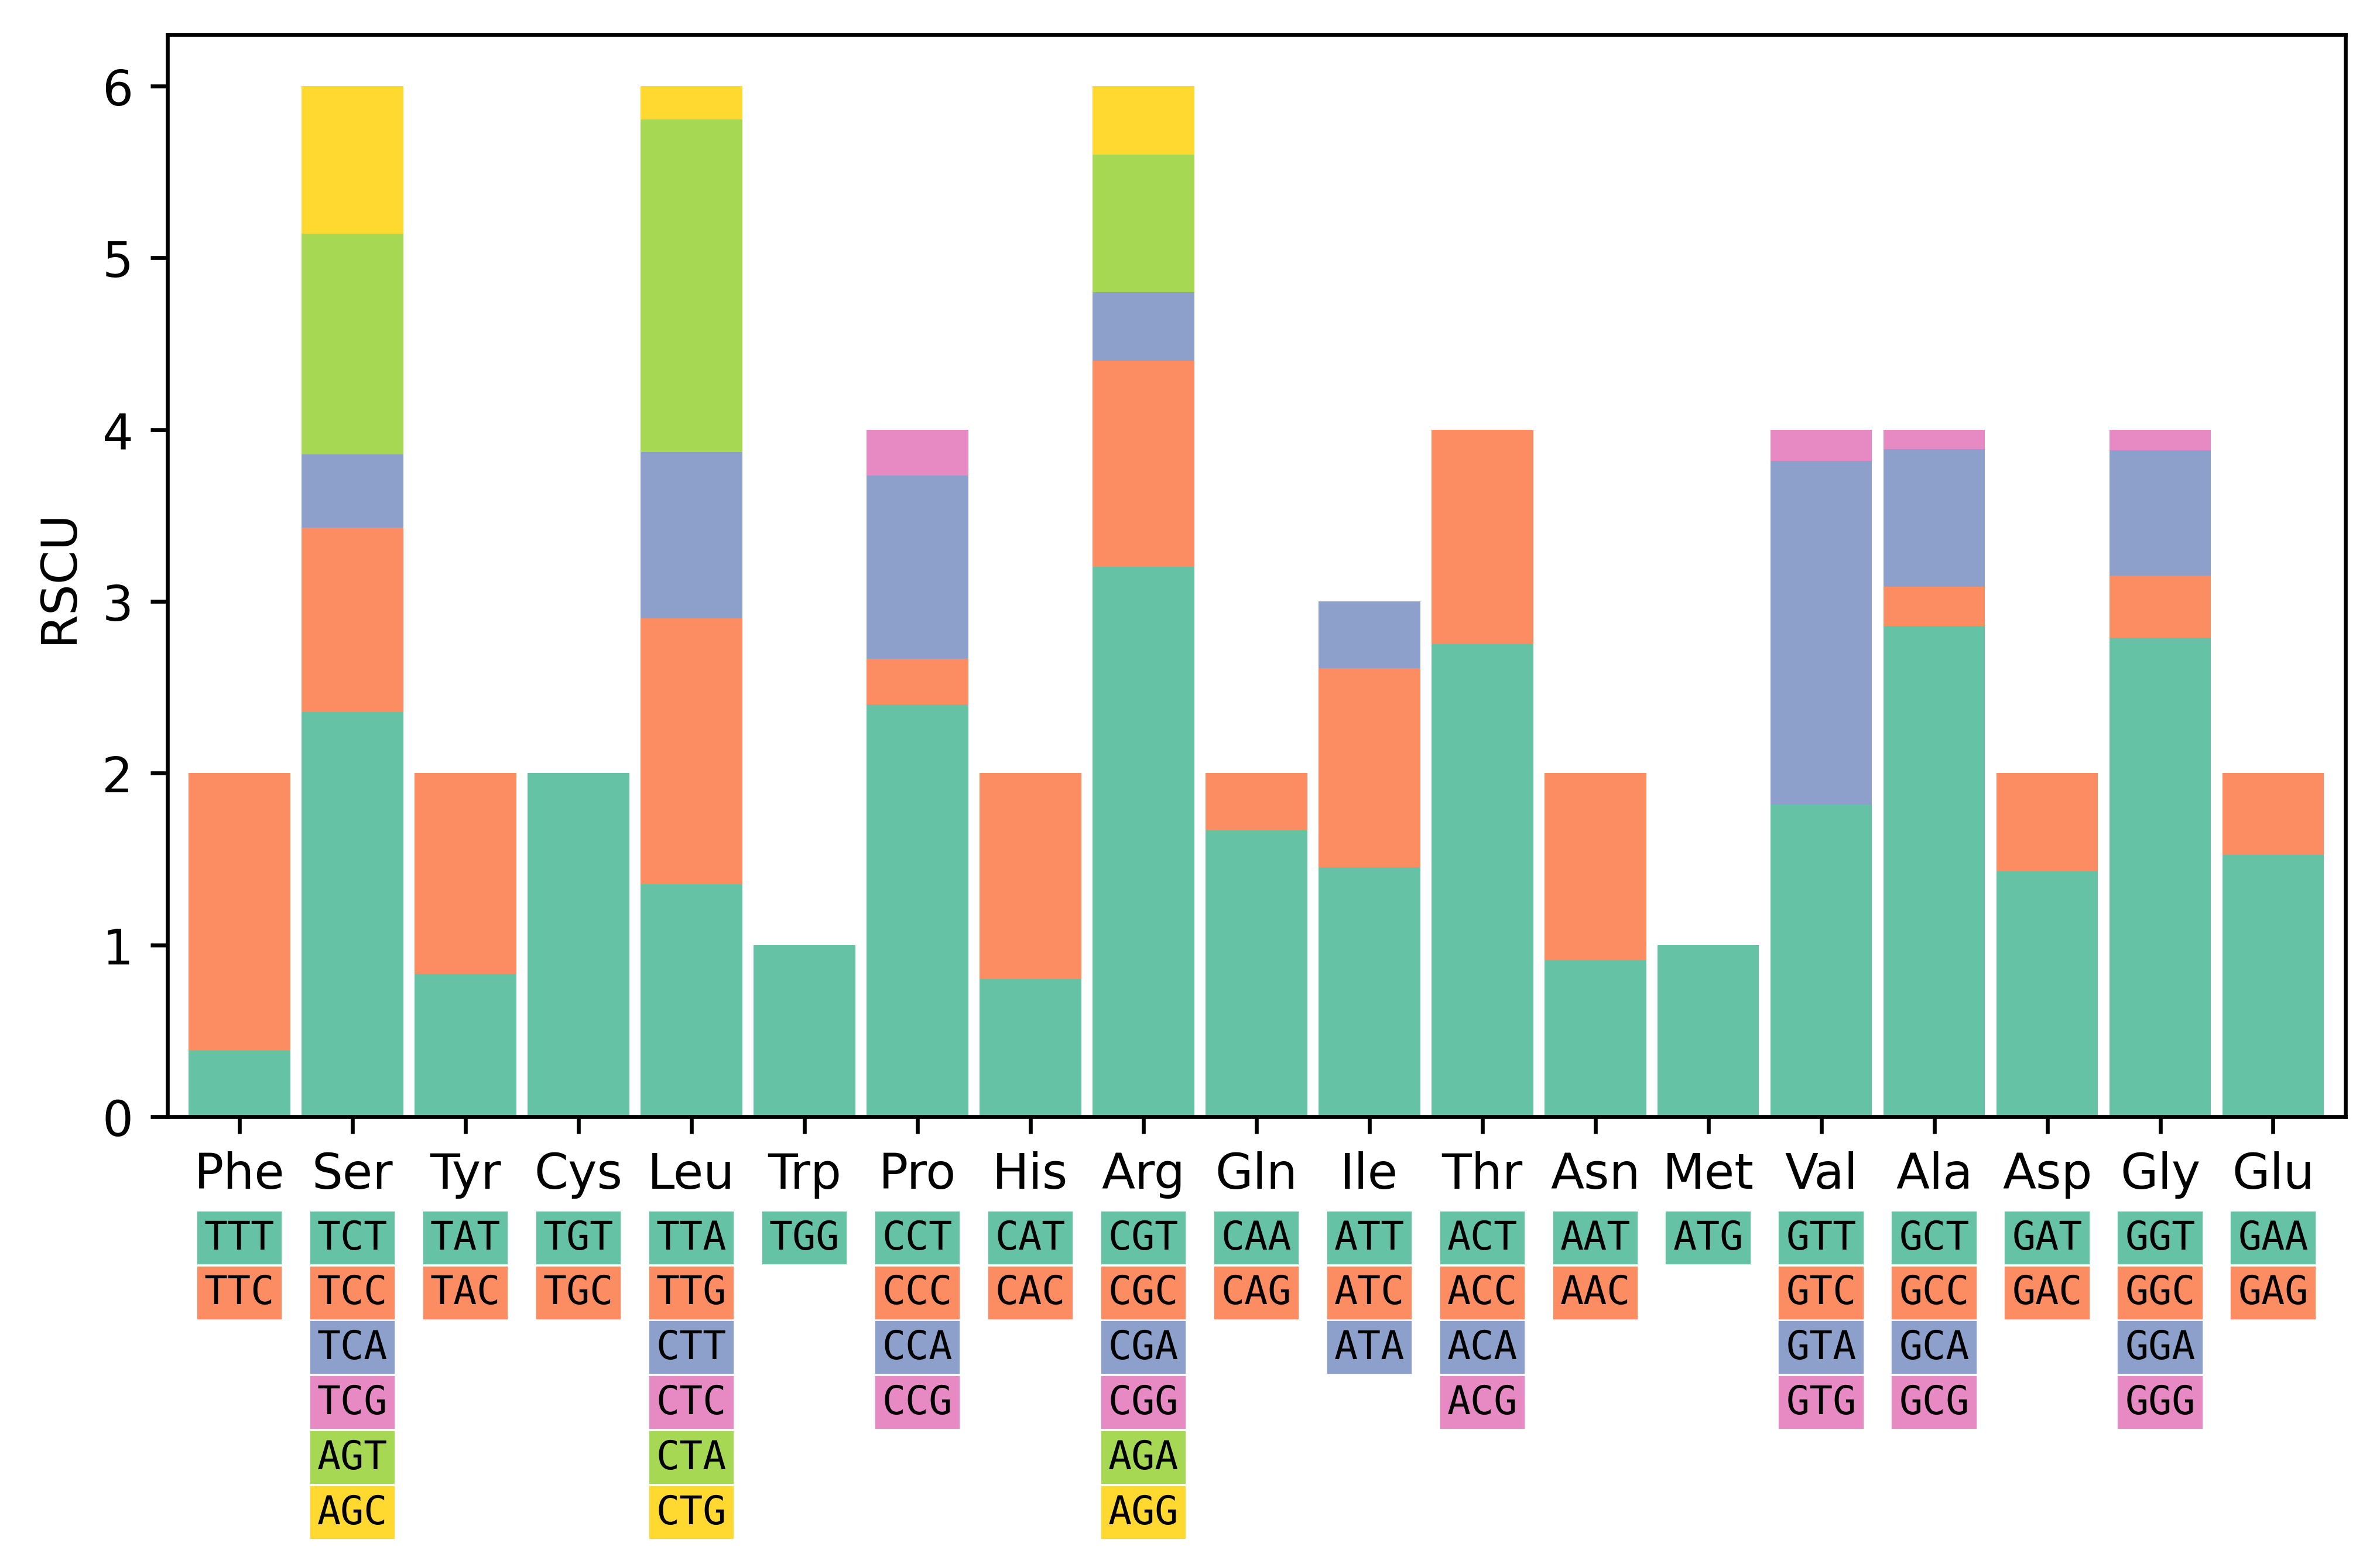

In [12]:
# example4: 计算 Obs, Franction, Frequency, RSCU
GeneName, Seqence = next(fastaio.FastaIO(inputfile))
print("输入的序列：\n")
print(">"+GeneName+"\n", Seqence, sep="")

# 计算
Obs = pycubcore.GetObs(Seqs=Seqence, Genetic_Codes=1) #Seqs这个参数可以是一个基因序列的string， 也可以是list, 如一个叶绿体的所以CDS序列的list, 从而计算整个物中Obs
Franction=pycubcore.GetFranction(Obs)
Frequency=pycubcore.GetFrequency(Obs)
RSCU=pycubcore.GetRSCU(Obs)

# 可视化
print("\n可视化：\n")
pycubcore.DrawCodonBarplot(Obs, data_type="Number")
pycubcore.DrawCodonBarplot(Franction, data_type="Franction")
pycubcore.DrawCodonBarplot(Frequency, data_type="Frequency")
pycubcore.DrawCodonBarplot(RSCU, data_type="RSCU")

In [7]:
# example5: 获得Cusp类似的结果
# Cusp website: https://www.bioinformatics.nl/cgi-bin/emboss/cusp

GeneName, Seqence = next(fastaio.FastaIO(inputfile))
print("输入的序列：\n")
print(">"+GeneName+"\n", Seqence, sep="")
print("\n")

Obs = pycubcore.GetObs(Seqs=Seqence, Genetic_Codes=1) 
print("Cusp结果：\n")
print(pycubcore.GetCusp(Obs, human_format=True)) #human_format=True 人类可阅读的输出，否则是机器可读

输入的序列：

>psbA
ATGACTGCAATTTTAGAGAGACGCGAAAGCGAAAGCCTATGGGGTCGCTTCTGTAACTGGATAACCAGCACTGAGAACCGTCTTTACATTGGATGGTTTGGTGTTTTGATGATCCCTACCTTATTGACCGCAACTTCTGTATTTATTATCGCCTTCATTGCTGCTCCTCCAGTAGATATTGATGGTATTCGTGAACCTGTTTCTGGGTCTCTACTTTACGGAAACAATATTATCTCTGGTGCCATTATTCCTACTTCTGCAGCTATAGGATTGCACTTTTACCCGATATGGGAAGCGGCATCCGTTGATGAATGGTTATACAATGGTGGTCCTTATGAATTGATTGTTCTACACTTCTTACTTGGTGTAGCTTCTTACATGGGTCGTGAGTGGGAACTAAGTTTCCGTCTGGGTATGCGCCCTTGGATTGCTGTTGCATATTCAGCTCCTGTTGCAGCTGCAACTGCTGTTTTCTTGATCTACCCAATCGGTCAAGGAAGCTTCTCTGATGGTATGCCCCTAGGAATCTCTGGTACTTTCAACTTCATGATTGTATTCCAGGCTGAGCACAACATTCTTATGCACCCATTTCACATGTTAGGTGTGGCTGGTGTATTCGGCGGCTCCCTATTCAGTGCTATGCATGGTTCCTTGGTAACTTCAAGTTTGATCAGGGAAACCACTGAAAATGAATCTGCTAATGAAGGTTACAGATTCGGTCAAGAGGAAGAAACTTATAATATCGTAGCTGCTCATGGTTATTTTGGCCGATTGATCTTCCAATATGCTAGTTTCAACAATTCTCGTTCTTTACATTTCTTCCTAGCTGCTTGGCCTGTAGTAGGTATCTGGTTCACTGCTTTAGGTATTAGTACCATGGCTTTCAACCTAAATGGTTTCAATTTCAACCAATCCGTAGTTGACAGTCAAGGTCGTGTAATTAACACTTGGGCTGATATCATCAACCGTGCTAACCTTGGTATGGA

In [9]:
# example6: 获得 codonW 软件类似的结果
GeneName, Seqence = next(fastaio.FastaIO(inputfile))
print("输入的序列：\n")
print(">"+GeneName+"\n", Seqence, sep="")
print("\n")

Obs = pycubcore.GetObs(Seqs=Seqence, Genetic_Codes=16) 
print("Cusp结果：\n")
print(pycubcore.GetcodonW(Obs, human_format=True)) #human_format=True 人类可阅读的输出，否则是机器可读

输入的序列：

>psbA
ATGACTGCAATTTTAGAGAGACGCGAAAGCGAAAGCCTATGGGGTCGCTTCTGTAACTGGATAACCAGCACTGAGAACCGTCTTTACATTGGATGGTTTGGTGTTTTGATGATCCCTACCTTATTGACCGCAACTTCTGTATTTATTATCGCCTTCATTGCTGCTCCTCCAGTAGATATTGATGGTATTCGTGAACCTGTTTCTGGGTCTCTACTTTACGGAAACAATATTATCTCTGGTGCCATTATTCCTACTTCTGCAGCTATAGGATTGCACTTTTACCCGATATGGGAAGCGGCATCCGTTGATGAATGGTTATACAATGGTGGTCCTTATGAATTGATTGTTCTACACTTCTTACTTGGTGTAGCTTCTTACATGGGTCGTGAGTGGGAACTAAGTTTCCGTCTGGGTATGCGCCCTTGGATTGCTGTTGCATATTCAGCTCCTGTTGCAGCTGCAACTGCTGTTTTCTTGATCTACCCAATCGGTCAAGGAAGCTTCTCTGATGGTATGCCCCTAGGAATCTCTGGTACTTTCAACTTCATGATTGTATTCCAGGCTGAGCACAACATTCTTATGCACCCATTTCACATGTTAGGTGTGGCTGGTGTATTCGGCGGCTCCCTATTCAGTGCTATGCATGGTTCCTTGGTAACTTCAAGTTTGATCAGGGAAACCACTGAAAATGAATCTGCTAATGAAGGTTACAGATTCGGTCAAGAGGAAGAAACTTATAATATCGTAGCTGCTCATGGTTATTTTGGCCGATTGATCTTCCAATATGCTAGTTTCAACAATTCTCGTTCTTTACATTTCTTCCTAGCTGCTTGGCCTGTAGTAGGTATCTGGTTCACTGCTTTAGGTATTAGTACCATGGCTTTCAACCTAAATGGTTTCAATTTCAACCAATCCGTAGTTGACAGTCAAGGTCGTGTAATTAACACTTGGGCTGATATCATCAACCGTGCTAACCTTGGTATGGA